In [23]:
#패키지 설정
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1. 분석 데이터 읽기

In [24]:
mtcars = sm.datasets.get_rdataset("mtcars","datasets", cache=True).data
#엔진 마력(hp)과 연비(mpg) 추출
data = mtcars[['hp', 'mpg']]
data1 = np.array(data)
data1

array([[110. ,  21. ],
       [110. ,  21. ],
       [ 93. ,  22.8],
       [110. ,  21.4],
       [175. ,  18.7],
       [105. ,  18.1],
       [245. ,  14.3],
       [ 62. ,  24.4],
       [ 95. ,  22.8],
       [123. ,  19.2],
       [123. ,  17.8],
       [180. ,  16.4],
       [180. ,  17.3],
       [180. ,  15.2],
       [205. ,  10.4],
       [215. ,  10.4],
       [230. ,  14.7],
       [ 66. ,  32.4],
       [ 52. ,  30.4],
       [ 65. ,  33.9],
       [ 97. ,  21.5],
       [150. ,  15.5],
       [150. ,  15.2],
       [245. ,  13.3],
       [175. ,  19.2],
       [ 66. ,  27.3],
       [ 91. ,  26. ],
       [113. ,  30.4],
       [264. ,  15.8],
       [175. ,  19.7],
       [335. ,  15. ],
       [109. ,  21.4]])

## 2. 탐색적 데이터 분석

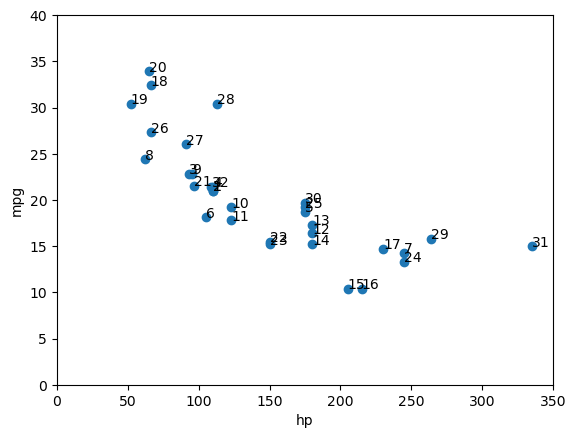

In [29]:
# 원데이터의 hp, mpg의 산포도
plt.scatter(data1[:, 0], data1[:, 1])
plt.xlabel('hp')
plt.ylabel('mpg')
plt.xlim(0, 350.0)
plt.ylim(0, 40.0)

# 행과 열의 수
rows, columns = data1.shape

for i in range(rows):
    plt.annotate(i+1, (data1[i,0], data1[i,1]))

## 3. 데이터 표준화

In [32]:
scaler = StandardScaler()
scaler.fit(data1)
data_std = scaler.transform(data1)
print(data_std)

[[-0.54365487  0.15329914]
 [-0.54365487  0.15329914]
 [-0.7955699   0.4567366 ]
 [-0.54365487  0.22072968]
 [ 0.41954967 -0.23442651]
 [-0.61774753 -0.33557233]
 [ 1.45684686 -0.97616253]
 [-1.25494437  0.72645879]
 [-0.76593284  0.4567366 ]
 [-0.35101396 -0.15013833]
 [-0.35101396 -0.38614524]
 [ 0.49364233 -0.62215216]
 [ 0.49364233 -0.47043343]
 [ 0.49364233 -0.8244438 ]
 [ 0.86410561 -1.63361037]
 [ 1.01229092 -1.63361037]
 [ 1.23456889 -0.90873199]
 [-1.19567025  2.07506974]
 [-1.40312969  1.737917  ]
 [-1.21048878  2.32793429]
 [-0.73629578  0.23758732]
 [ 0.04908639 -0.77387089]
 [ 0.04908639 -0.8244438 ]
 [ 1.45684686 -1.1447389 ]
 [ 0.41954967 -0.15013833]
 [-1.19567025  1.21533026]
 [-0.82520696  0.99618098]
 [-0.49919927  1.737917  ]
 [ 1.73839896 -0.72329798]
 [ 0.41954967 -0.06585014]
 [ 2.79051468 -0.85815908]
 [-0.5584734   0.22072968]]


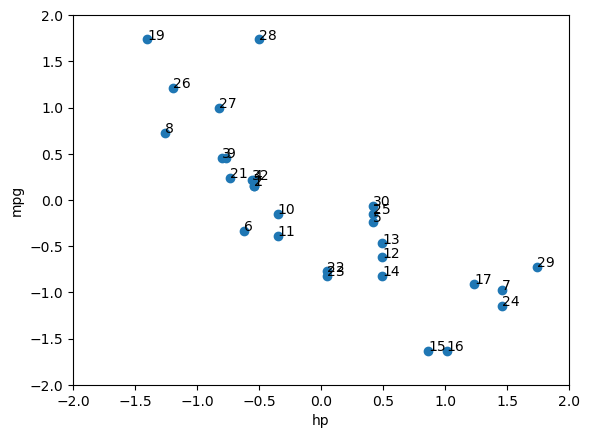

In [22]:
# 표준화된 데이터의 hp, mpg의 산포도
plt.scatter(data_std[:, 0], data_std[:, 1])
plt.xlabel('hp')
plt.ylabel('mpg')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape

for i in range(rows):
    plt.annotate(i+1, (data_std[i,0], data_std[i,1]))

## 4. 군집화

In [46]:
# 군집의 수를 3개로 하는 군집화 객체
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_std)

C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto')

In [47]:
# 군집 라벨
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [48]:
# 군집별 군집 중심
kmeans.cluster_centers_

array([[ 0.81501922, -0.76438847],
       [-0.81501922,  0.76438847]])

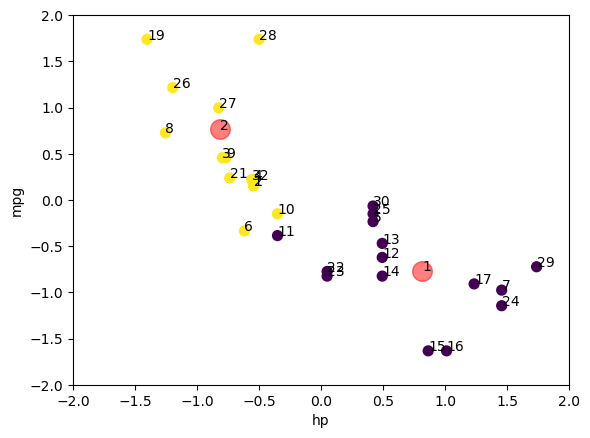

In [50]:
# 군집 데이터 분포
plt.scatter(data_std[:, 0], data_std[:, 1], 
            c=kmeans.labels_, s=50)
plt.xlabel('hp')
plt.ylabel('mpg')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape

# 데이터 라벨
for i in range(rows):
    plt.annotate(i+1, (data_std[i,0], data_std[i,1]))

# 군집 중심 표시
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.5);
k = 2
# 군집 라벨
for k in range(0, k):
    plt.annotate(k+1,
                 (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

## 5. 클러스터 출력

In [54]:
# 클러스터 수별 TWSS 값
TWSS = {}
# 군집 수 1~5까지 반복
for j in range(1, 6):
    # 군집 수 설정과 군집화 객체 생성
    model = KMeans(n_clusters=j)
    # 표준화된 hp, mpg 데이터에 대한 군집화
    model.fit(data_std)
    # 군집 수별 TWSS 값 저장
    TWSS[j] = model.inertia_

C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guym3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

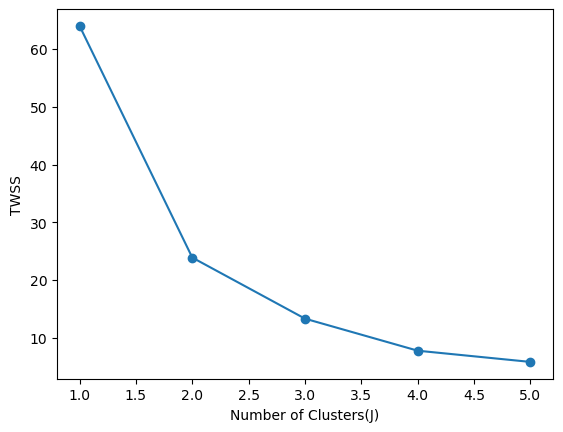

In [55]:
# 군집 수에 따른 TWSS 그래프
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(J)")
plt.ylabel("TWSS")
plt.show()